# _Python for Scientific Data Analysis_


#  Matplotlib

## Section 2: Subplots and Axes Configurations (continued)

In [1]:
#preamble stuff
import matplotlib.pyplot as plt
import numpy as np

### Customizing Axes

By default, _**matplotlib**_ does not print minor tick marks and has the major tick marks facing outside the plot boundaries.  A lot of people don't like this (me included) and envy IDL's standard of always having inward-facing marks and minor tick marks (so, you know, you can _actually_ read graphs).  Thankfully, though we can _customize_ the axes to work around problems like these and others.  The key step is to create the _axes_ object: e.g. ``fig,axes = plt.subplots()``

#### _Tick Marks_

First, we can make Python plot minor ticks for linear plots: _axes.[x,y]axis.set_minor_locator(Autolocator([number]))_ .  The _number_ here determines the number of minor tick marks in between major ticks.   E.g. ``axes.xaxis.set_minor_locator(Autolocator(3))`` says "put three minor tick marks in between each major tick on the x axis".  

E.g. see below ...

2


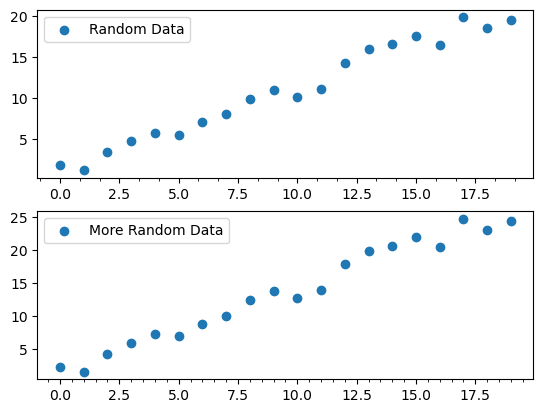

In [6]:
from matplotlib.ticker import AutoMinorLocator

xarray=np.arange(0,20)
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*1.25

#two rows, one column
fig,axes=plt.subplots(2,1)

print(len(axes))

axes[0].scatter(xarray,yarray,label='Random Data')
axes[0].xaxis.set_minor_locator(AutoMinorLocator(3))
axes[1].scatter(xarray,yarray2,label='More Random Data')
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))
axes[0].legend(loc='best')
axes[1].legend(loc='best')

Now, for plots with a _logarithmic_ scale (see next section) on one of the axes, this is not going to work (Autolocator only works with linear plots).  So we have to do something else.  The cleanest way to do this -- and maintain control over how many minor ticks are produced -- is with _ticker.LogLocator_ .  See the API here: [https://matplotlib.org/stable/api/ticker\_api.html#matplotlib.ticker.LogLocator]().  Here, the key words are ``base`` (should be set to 10 for a log-10 scaling) and ``subs``.  ``subs`` is a bit tricky, but think of it as defining an array of minor tick spacings between major ticks.  E.g. ``np.arange(2,10)*0.1`` will put 8 minor ticks in between, say, 10 and 100 (etc); ``np.arange(2,5)*0.2`` would put 19 minor ticks between, say, 10 and 100 (etc).

2


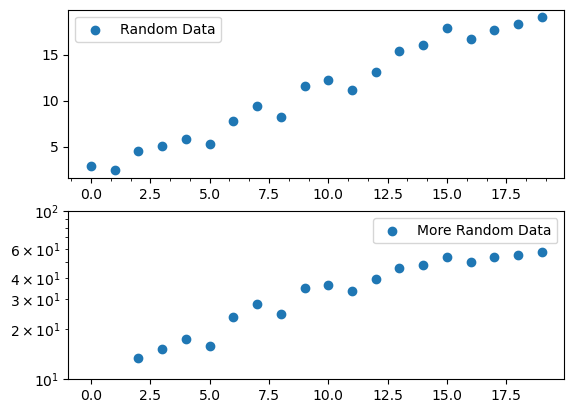

In [7]:
from matplotlib.ticker import LogLocator

xarray=np.arange(0,20)
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*3

#two rows, one column
fig,axes=plt.subplots(2,1)

print(len(axes))

axes[0].scatter(xarray,yarray,label='Random Data')
axes[0].xaxis.set_minor_locator(AutoMinorLocator(3))
axes[1].scatter(xarray,yarray2,label='More Random Data')
axes[1].set_yscale('log')
axes[1].set_ylim(10,100)
axes[1].yaxis.set_minor_locator(LogLocator(base=10,subs=np.arange(2,10)*.1))


axes[0].legend(loc='best')
axes[1].legend(loc='best')

We can also change the tick marks formats in various ways using the _tick\_params_ attribute of the _axes_ .   The call is usually ``axes.tick_params( )``, where the parentheses enclose various keywords.  An overriding keyword is _which_ : this tells Python to which ticks (major, minor, or both) the following settings should apply.  Another is _axis_ : this tells Python which axis (x,y, or both) the following settings should apply.  

Beyond that, important keywords include:

- _direction_ : sets the direction of the tick marks (in, out, or inout).  E.g. ``axes_tick_params(which='both', axis='x',direction='in')`` says "make the major and minor ticks on the x axis point inwards".  Similarly, ``axes_tick_params(which='major', axis='both',direction='inout')`` says "make the major axis tick marks on both the x and y axes point in _and_ out".

- _length_ : sets the length of the tick marks.
- _width_ : sets the width of the tick marks.
- _labelsize_ : sets the size of the x and/or y axis labels. (e.g. this will make the numbers on the axes appear larger or smaller)
- _color_ : sets their color. 

The full API is here:
[https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html]()

Another thing we can do is add a _grid_ within the body of the figure: e.g. solid, dashed, dotted etc lines connecting major axes (e.g. ``axes.grid(True,linestyle='dashed',color='r')`` to make a red, dashed grid).  Some people think this clutters up figures: I think it can make them easier to interpret.

2


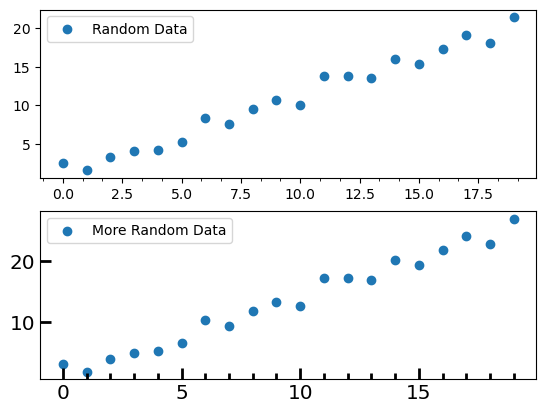

In [9]:
xarray=np.arange(0,20)
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*1.25

#two rows, one column
fig,axes=plt.subplots(2,1)

print(len(axes))

axes[0].scatter(xarray,yarray,label='Random Data')
axes[0].xaxis.set_minor_locator(AutoMinorLocator(3))
axes[1].scatter(xarray,yarray2,label='More Random Data')
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))
axes[1].tick_params(which='both',width=2,direction='in',labelsize='x-large')
axes[1].tick_params(which='major',length=8)
axes[1].tick_params(which='minor',length=4)
axes[0].legend(loc='best')
axes[1].legend(loc='best')


#ax.tick_params(which='both',width=1.5,direction='in',labelsize='large')
#  ax.tick_params(which='major',length=6)
#  ax.tick_params(which='minor',length=3)

Below is one detailed example, where we modify the previous 4-panel plot to plot minor ticks and make larger and thicker inward-pointing tick major/minor marks:

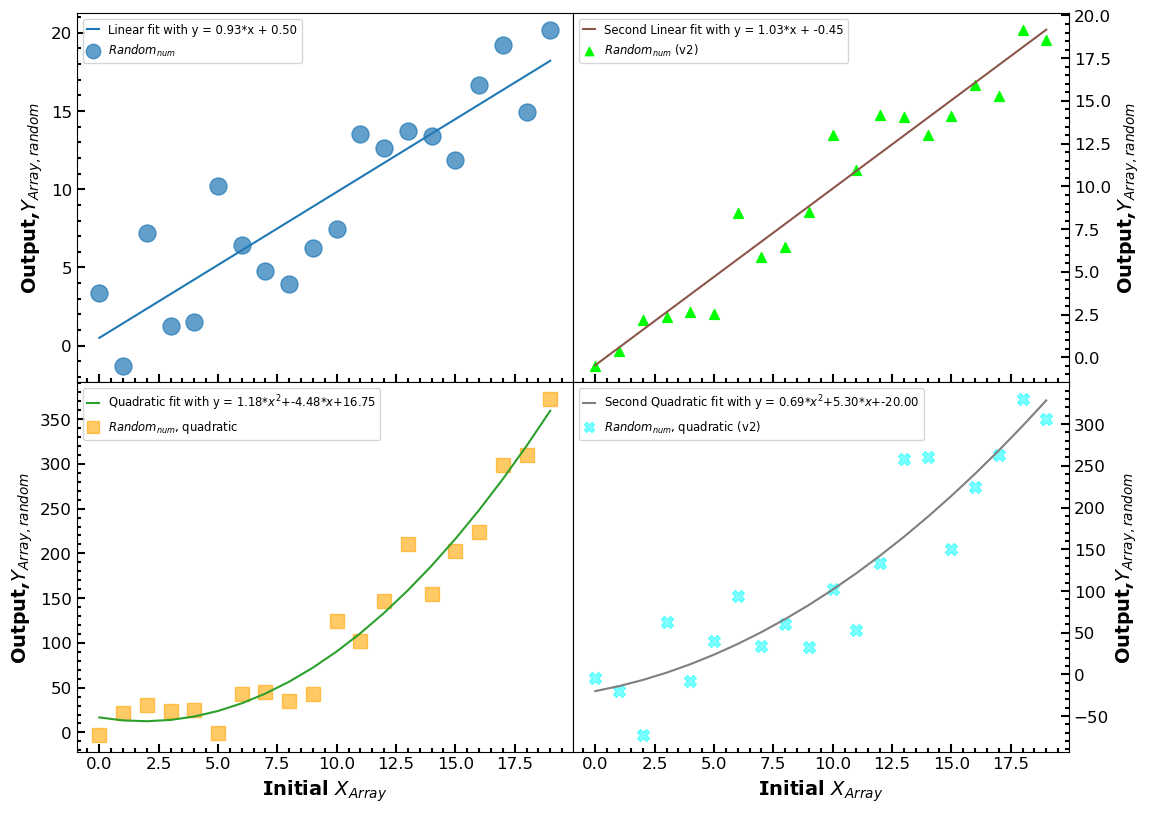

In [10]:
###(Ex_2.3a)

 #from matplotlib.ticker import FormatStrFormatter
#import matplotlib.pyplot as plt
# import numpy as np
 #from matplotlib import ticker
    
from matplotlib.ticker import AutoMinorLocator

xarray=np.arange(20)   #an array of numbers from 0 to 19

#Panel 1 determination
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

#Panel 2 determination
yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit


#Panel 3 determination

yarray3=(np.arange(20))**2.+40*np.random.randn(20)

 #polynomial of degree two
a3,b3,c3=np.polyfit(xarray,yarray3,2)

poly2=np.poly1d(np.polyfit(xarray,yarray3,2))
 #a convenience class to write the polynomial fit


#Panel 4 determination
yarray4=np.arange(20)+1.5*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a4,b4=np.polyfit(xarray,yarray4,1)
 #a polynomial fit of degree one look up the documentation if you are curious



standardsize=np.array((6.4,4.8))
scaleval=2
newsize=list(scaleval*standardsize)

#the default width is 6.4 inches by 4.8 inches, here increase width by 2x using variables
fig,axes=plt.subplots(2,2,figsize=newsize,sharex=True)
#,sharey=True)
fig.subplots_adjust(hspace=0,wspace=0)

# turn the fit labels, fit data points, fit colors, data point colors, data point sizes, ...
## data markers (symbols), data alphas ... all to lists

labels_fits = ['Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b),'Second Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a4,b4),
             r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2), r'Second Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a3,b3,c3)]

labels_data=[r'$Random_{num}$',r'$Random_{num}$ (v2)',r'$Random_{num}$, quadratic',r'$Random_{num}$, quadratic (v2)']

colors_fit=['tab:blue','tab:brown','tab:green','tab:gray']

colors_data=['tab:blue','lime','orange','cyan']

sizes_data=[150,50,100,75]
marker_data=['o','^','s','X']
alphas_data=[0.7,1,0.6,0.5]
#turn the functional fits into a list

eq=[xarray*a+b,xarray*a4+b4,poly(xarray),poly2(xarray)]

#turn the generated data arrays into a list
dataarr=[yarray,yarray4,yarray2,yarray3]

#use python enumerate over axes; flatten axes ... columns first, then rows
# ax represents each iteration of axes (i.e. axes.flat([0]), axes.flat([1]), etc etc
# you advance i as well
for i,ax in enumerate(axes.flat):
  ax.plot(xarray,eq[i],label=labels_fits[i],c=colors_fit[i])
  ax.scatter(xarray,dataarr[i],marker=marker_data[i],c=colors_data[i],s=sizes_data[i],alpha=alphas_data[i],label=labels_data[i])
  ax.legend(loc='upper left',fontsize='small',handlelength=1,markerscale=0.85)
  ax.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')


###Important New Stuff Here
  ax.xaxis.set_minor_locator(AutoMinorLocator(5))
  ax.yaxis.set_minor_locator(AutoMinorLocator(5))
  ax.tick_params(which='both',width=1.5,direction='in',labelsize='large')
  ax.tick_params(which='major',length=6)
  ax.tick_params(which='minor',length=3)

#now, iterate over the subplots on the righthand side only
for i,ax in enumerate([axes[0,1],axes[1,1]]):
  ax.yaxis.tick_right()
  ax.yaxis.set_label_position("right")



#![](./code/sect2/figures/Ex2_3a.png)

And here's a slightly more complex version, where for the lefthand panels we make the major axis tick marks magenta, make the numbers larger, and change the number orientation to be at 45 degrees.  For the top-right panel, we change the label size, while for the bottom-right panel we add a grid of dotted lines with "tab:blue" color. 

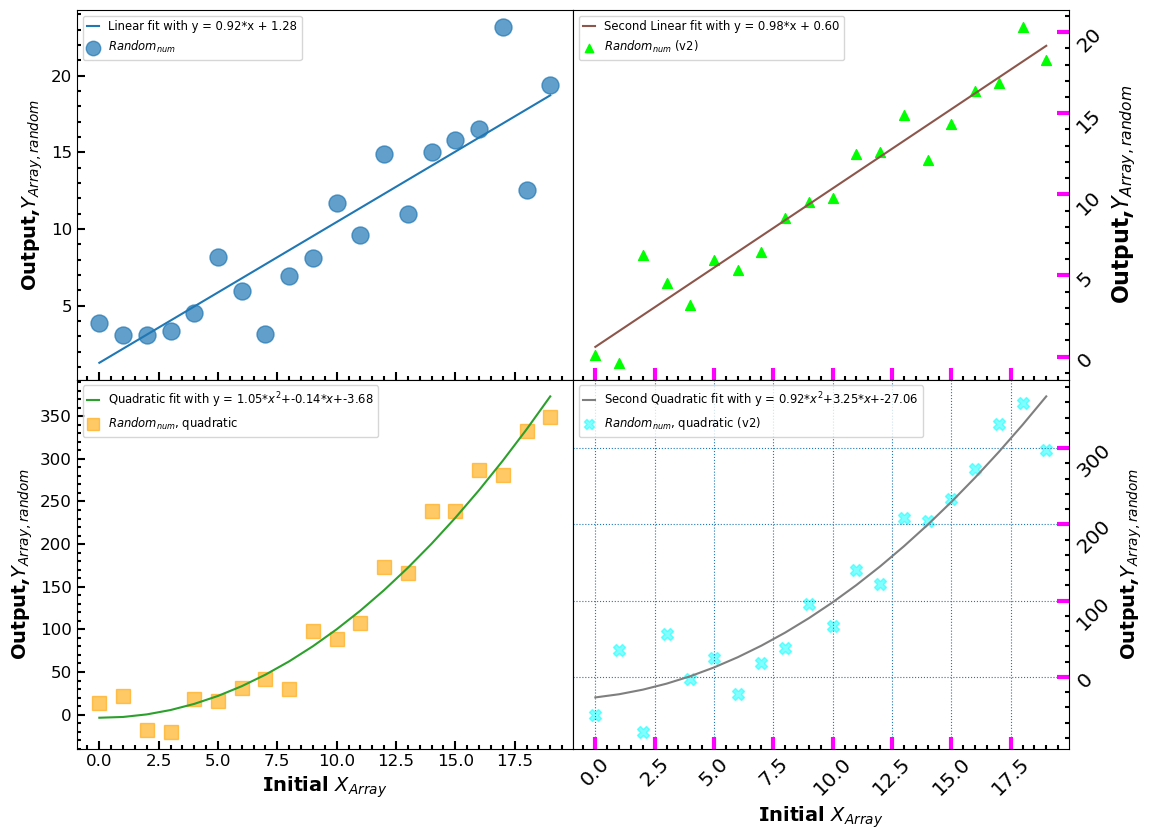

In [11]:
###(Ex_2.3b)


# import numpy as np
# import matplotlib.pyplot as plt
# #from matplotlib.ticker import FormatStrFormatter
# from matplotlib import ticker
from matplotlib.ticker import MultipleLocator,AutoMinorLocator

xarray=np.arange(20)   #an array of numbers from 0 to 19

#Panel 1 determination
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x
a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

#Panel 2 determination
yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit


#Panel 3 determination

yarray3=(np.arange(20))**2.+40*np.random.randn(20)

 #polynomial of degree two
a3,b3,c3=np.polyfit(xarray,yarray3,2)

poly2=np.poly1d(np.polyfit(xarray,yarray3,2))
 #a convenience class to write the polynomial fit


#Panel 4 determination
yarray4=np.arange(20)+1.5*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a4,b4=np.polyfit(xarray,yarray4,1)
 #a polynomial fit of degree one look up the documentation if you are curious



standardsize=np.array((6.4,4.8))
scaleval=2
newsize=list(scaleval*standardsize)

#the default width is 6.4 inches by 4.8 inches, here increase width by 100% using variables
fig,axes=plt.subplots(2,2,figsize=newsize,sharex=True)
#,sharey=True)
fig.subplots_adjust(hspace=0,wspace=0)

# turn the fit labels, fit data points, fit colors, data point colors, data point sizes, ...
## data markers (symbols), data alphas ... all to lists

labels_fits = ['Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b),'Second Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a4,b4),
             r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2), r'Second Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a3,b3,c3)]

labels_data=[r'$Random_{num}$',r'$Random_{num}$ (v2)',r'$Random_{num}$, quadratic',r'$Random_{num}$, quadratic (v2)']

colors_fit=['tab:blue','tab:brown','tab:green','tab:gray']

colors_data=['tab:blue','lime','orange','cyan']

sizes_data=[150,50,100,75]
marker_data=['o','^','s','X']
alphas_data=[0.7,1,0.6,0.5]

#turn the functional fits into a list

eq=[xarray*a+b,xarray*a4+b4,poly(xarray),poly2(xarray)]

#turn the generated data arrays into a list
dataarr=[yarray,yarray4,yarray2,yarray3]

#use python enumerate over axes; flatten axes ... columns first, then rows
# ax represents each iteration of axes (i.e. axes.flat([0]), axes.flat([1]), etc etc
# you advance i as well
for i,ax in enumerate(axes.flat):
  ax.plot(xarray,eq[i],label=labels_fits[i],c=colors_fit[i])
  ax.scatter(xarray,dataarr[i],marker=marker_data[i],c=colors_data[i],s=sizes_data[i],alpha=alphas_data[i],label=labels_data[i])
  ax.legend(loc='upper left',fontsize='small',handlelength=1,markerscale=0.85)
  ax.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

  ax.xaxis.set_minor_locator(AutoMinorLocator(5))
  ax.yaxis.set_minor_locator(AutoMinorLocator(5))
  ax.tick_params(which='both',width=1.5,direction='in',labelsize='large')
  ax.tick_params(which='major',length=6)
  ax.tick_params(which='minor',length=3)

#now, iterate over the subplots on the righthand side only
for i,ax in enumerate([axes[0,1],axes[1,1]]):
  ax.yaxis.tick_right()
  ax.yaxis.set_label_position("right")
  if i == 0:
   ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',color='black',weight='bold',size=16)
  else:
   ax.grid(True,linestyle='dotted',color='tab:blue')
  ax.tick_params(which='major',color='magenta',labelsize='x-large',labelrotation=45,width=3,length=9)


#![](./code/sect2/figures/Ex2_3b.png)

### _Axis Limits, Scaling, and Formatting_

While _**matplotlib**_ automatically sets axis limits by default, we can also 1) manually adjust them, 2) adjust whether the data are displayed on a linear scale, log scale or semilog scale, 2) adjust the formatting of numbers displayed along each axis, and 4) adjust the spine thicknesses and appearances.

- 1) _**limits**_ -- We discussed this in the previous section but it bears worth repeating.  With _plt_, the limits are set by ``plt.[x,y]lim([min number],[max number])``  E.g. ``plt.xlim(1,100)`` sets the x-axis limits on the plot to be between 1 and 100. 

**important**- With the _axes_ container it is ``axes.set_[x,y]lim([min number],[max number])``.  E.g. to set the x axis limits to be between 1 and 100 you do ``axes.set_xlim(1,100)``.

- 2) _**scaling**_ -- with _plt_, the scaling is set by ``plt.[x,y]scale([scale type])``, where scale type can be 'linear', 'log','symlog' (symmetric about 0), 'logit', etc.  See here: [https://matplotlib.org/stable/gallery/scales/]().  

 With the _axes_ container it is ``axes._set[x,y]scale([scale type])``.  E.g. see here [https://matplotlib.org/stable/api/\_as\_gen/matplotlib.axes.Axes.set_ylim.html]()

-  3) _**formatting numbers on axes**_ -- this is handled using the _axis_ container and calling ``from matplotlib import ticker`` to import the _ticker_ function.   Then you _set\_major\_formatter_ .

 E.g. ``axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))`` will make the numbers along the y-axis be a floating point with 3 places after the decimal (note: we already did this in Figure 2.2c). See here: [https://matplotlib.org/stable/api/ticker\_api.html]()

- 4) _**formatting the axis spines**_ -- This is surprisingly tricky to do efficiently compared to IDL.  There are two ways I know of to cleanly do this. First, use the _axes.spines_ property.  There are typically four spines: 'top','bottom','left','right'.  Now, for one you can do all this manually: e.g. ``axes.spines['top'].[do stuff]``.    Here 'do stuff' can include a bunch of things.  For one you can change the axis thicknesses from the default value of 1.5: e.g. ``axes.spines['top'].set_linewidth(3)``

 You can also do a for-loop over these spines in fewer lines of code: e.g. 

```
 for axnum in ['top','bottom','left','right']: 
        axes.spines[axn].set_linewidth(4)
```
 
Another efficient way of coding this is to use _plt_ instead to "set properties" (_setp_): e.g. ``plt.setp(ax.spines.values(),[do stuff])``.  What stuff can you do? Well, one way to figure that is to type ``plt.getp(axes.spines.values())``, which will tell you all of the properties of _axes.spines_ (and thus all of the ways you can modify these properties).   For changing the linewidth to 3, we would do the following: ``plt.setp(ax.spines.values(),linewidth=3``.

#### _A Worked Example_

In the following example, we 1) set the y axis limits for each plot ( (-7,27) and (0.5,500) for the left and right panels, respectively), 2) set the righthand y axis scaling to logarithmic, 3) make the y axis numbers display as floating point with 1 digit after the decimal, and 4) thicken the axes spines to a value of 2.  We also increased the size of the numbers somewhat.

See here:
    

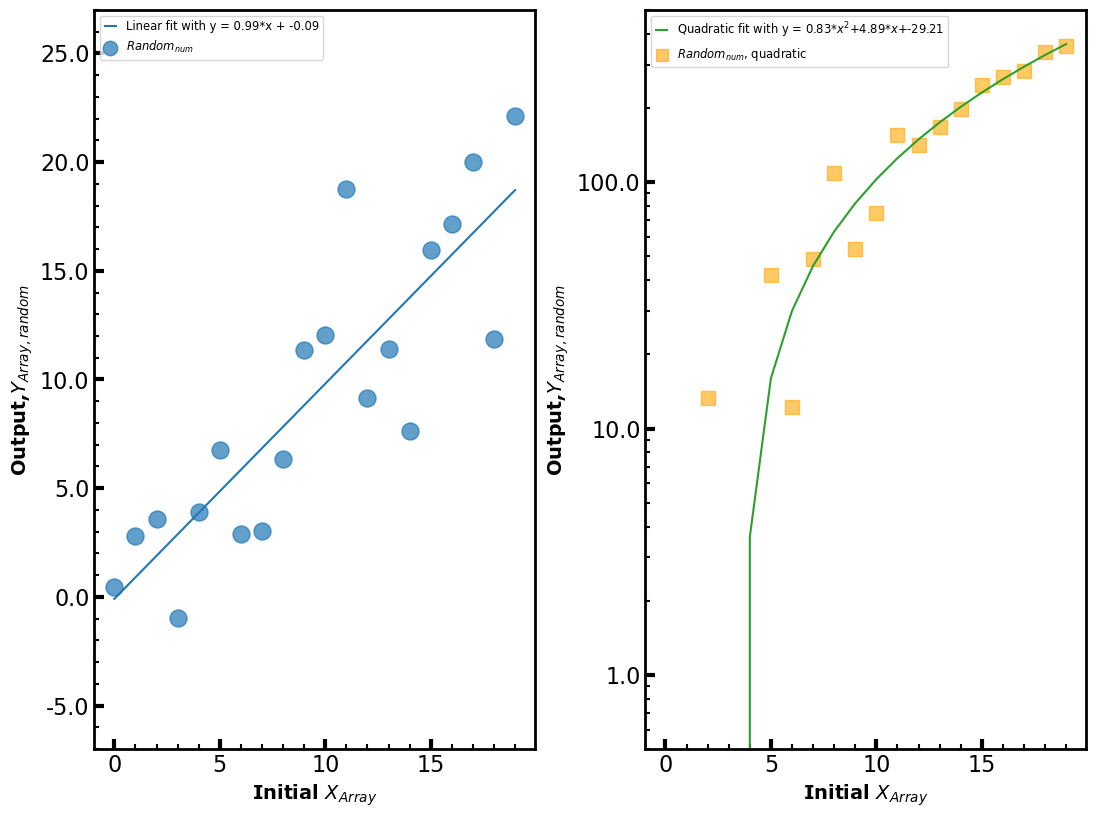

In [12]:
###(Ex_2.4)

#import matplotlib.pyplot as plt
#import numpy as np
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator,AutoMinorLocator

xarray=np.arange(20)   #an array of numbers from 0 to 19

# in this example, we are just going to do one linear plot and one quadratic plot
#Panel 1 determination
yarray=np.arange(20)+3*np.random.randn(20)

 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

#Panel 2 determination
yarray2=(np.arange(20))**2.+20*np.random.randn(20)

#this is equivalent to yarray2[where(yarray2 le 0)] > 0.01 in IDL
  #it basically sets to 0.01 any value from the random number generator that is less than 0
(yarray2 > 0.0).choose(yarray2,0.01)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit


standardsize=np.array((6.4,4.8))
scaleval=2
newsize=list(scaleval*standardsize)

#the default width is 6.4 inches by 4.8 inches, here increase width by 100% using variables
fig,axes=plt.subplots(1,2,figsize=newsize)
fig.subplots_adjust(hspace=0.25,wspace=0.25)

# turn the fit labels, fit data points, fit colors, data point colors, data point sizes, ...
## data markers (symbols), data alphas ... all to lists

labels_fits = ['Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b),
             r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2)]

labels_data=[r'$Random_{num}$',r'$Random_{num}$, quadratic']

colors_fit=['tab:blue','tab:green','tab:gray']

colors_data=['tab:blue','orange']

sizes_data=[150,100]
marker_data=['o','s']
alphas_data=[0.7,0.6]

#turn the functional fits into a list

eq=[xarray*a+b,poly(xarray)]

#turn the generated data arrays into a list
dataarr=[yarray,yarray2]

#use python enumerate over axes; flatten axes ... columns first, then rows
# ax represents each iteration of axes (i.e. axes.flat([0]), axes.flat([1]), etc etc
# you advance i as well
for i,ax in enumerate(axes.flat):
  ax.plot(xarray,eq[i],label=labels_fits[i],c=colors_fit[i])
  ax.scatter(xarray,dataarr[i],marker=marker_data[i],c=colors_data[i],s=sizes_data[i],alpha=alphas_data[i],label=labels_data[i])
  ax.legend(loc='upper left',fontsize='small',handlelength=1,markerscale=0.85)
  ax.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

  ax.tick_params(which='both',direction='in',labelsize=16)
  #note: I changed the label size to make the numbers larger
  
  ax.tick_params(which='major',length=7,width=3)
  ax.tick_params(which='minor',length=3.5,width=1.5)
  ax.xaxis.set_minor_locator(AutoMinorLocator(5))


  if i == 0:
   ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',color='black',weight='bold',size=14)
   ax.set_ylim(-7,27)
   ax.set_yscale('linear')
   ax.yaxis.set_minor_locator(AutoMinorLocator(5))
  else:
   ax.set_ylim(0.5,500)
   ax.set_yscale('log')
   ax.yaxis.set_minor_locator(ticker.LogLocator(base=10,subs=np.arange(1,10)*.1))

  ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
  #floating point with one digit after the decimal

# one way to thicken spines of the plot
  for axl in ['top','bottom','left','right']:
   ax.spines[axl].set_linewidth(2)
#other way
  #plt.setp(ax.spines.values(),linewidth=2)

# plt.show()


#![](./code/sect2/figures/Ex2_4.png)